In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
from numpy import sqrt
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
import sklearn
import statsmodels.api as sm
from scipy.stats import boxcox

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/historical prices 2024.csv')
df

,date,symbol,contract,Last,Transformed
0,1/26/2018,LQF18,ICE NewCastle Coal January 2018 Futures,106.50,0.096900
1,2/23/2018,LQG18,ICE NewCastle Coal February 2018 Futures,105.10,0.097544
2,3/29/2018,LQH18,ICE NewCastle Coal March 2018 Futures,96.40,0.101850
3,4/27/2018,LQJ18,ICE NewCastle Coal April 2018 Futures,93.65,0.103335
4,5/25/2018,LQK18,ICE NewCastle Coal May 2018 Futures,105.45,0.097382
...,...,...,...,...,...
71,12/29/2023,LQZ23,ICE Newcastle Coal December 2023 Futures,146.40,0.082647
72,1/26/2024,LQF24,ICE Newcastle Coal January 2024 Futures,127.10,0.088701
73,2/23/2024,LQG24,ICE Newcastle Coal February 2024 Futures,119.40,0.091516
74,3/28/2024,LQH24,ICE Newcastle Coal March 2024 Futures,129.10,0.088011


In [ ]:
df.describe()

,Last,Transformed
count,76.000000,76.000000
mean,151.155921,0.093339
std,106.047348,0.025579
min,49.750000,0.048018
25%,82.512500,0.076711
50%,114.125000,0.093607
75%,169.937500,0.110103
max,433.700000,0.141776


In [ ]:
# # @title Nilai Impor Migas-NonMigas (Juta US$)

# from matplotlib import pyplot as plt
# df['Last'].plot(kind='line', figsize=(8, 4), title='Last')
# plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Mengonversi kolom tanggal menjadi datetime
df['date'] = pd.to_datetime(df['date'])

# Mengubah format tanggal menjadi 'YYYY-Bulan-DD' (dalam bahasa Indonesia)
df['date'] = df['date'].dt.strftime('%Y-%B-%d')

# Mengatur kolom tanggal sebagai indeks
df.set_index('date', inplace=True)

# Menampilkan DataFrame
df

,symbol,contract,Last,Transformed
date,,,,
2018-January-26,LQF18,ICE NewCastle Coal January 2018 Futures,106.50,0.096900
2018-February-23,LQG18,ICE NewCastle Coal February 2018 Futures,105.10,0.097544
2018-March-29,LQH18,ICE NewCastle Coal March 2018 Futures,96.40,0.101850
2018-April-27,LQJ18,ICE NewCastle Coal April 2018 Futures,93.65,0.103335
2018-May-25,LQK18,ICE NewCastle Coal May 2018 Futures,105.45,0.097382
...,...,...,...,...
2023-December-29,LQZ23,ICE Newcastle Coal December 2023 Futures,146.40,0.082647
2024-January-26,LQF24,ICE Newcastle Coal January 2024 Futures,127.10,0.088701
2024-February-23,LQG24,ICE Newcastle Coal February 2024 Futures,119.40,0.091516


In [ ]:
import plotly.express as px

# Asumsi df sudah terdefinisi dan memiliki kolom 'Last'
fig = px.line(df, y='Last', template='plotly_white')
fig.update_layout(
    title='Harga Coal Newcastle',
    yaxis_title='Last'  # Menambahkan judul pada sumbu y
)
fig.show()


#ACF PACF

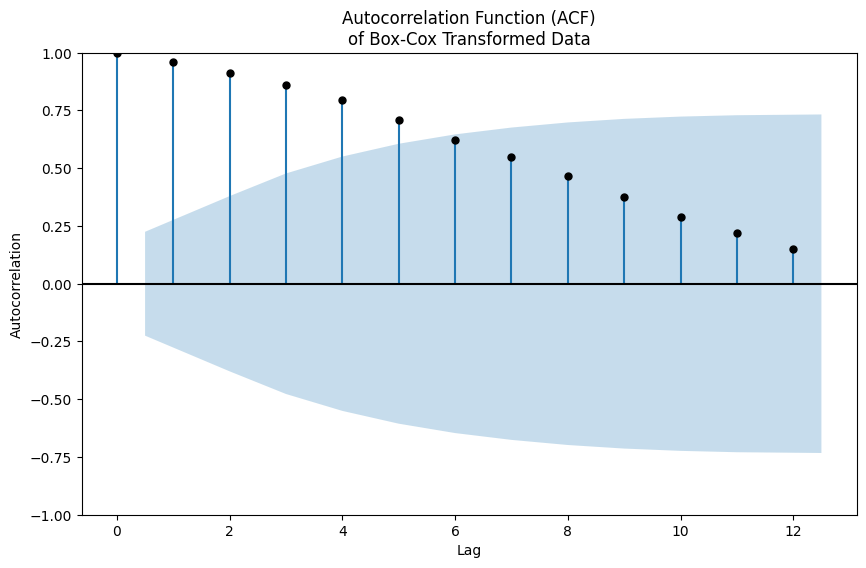

In [ ]:
# Plot ACF
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.tsa.plot_acf(df['Last'], lags=12, ax=ax, color='black')
plt.title('Autocorrelation Function (ACF)\nof Box-Cox Transformed Data')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

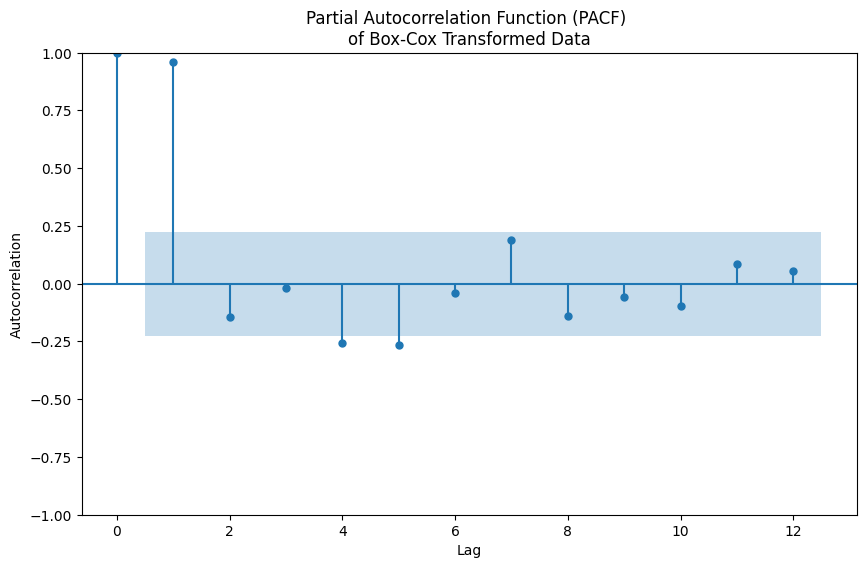

In [ ]:
# Plot PACF
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.tsa.plot_pacf(df['Last'], lags=12, ax=ax)
plt.title('Partial Autocorrelation Function (PACF) \nof Box-Cox Transformed Data')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df['Last'])
print('ADF Statistic: %f' % adf[0])
print('p-value: %f' % adf[1])
print('Critical Values:')
for key, value in adf[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.209444
p-value: 0.202836
Critical Values:
	1%: -3.526
	5%: -2.903
	10%: -2.589


P-value > 0.05 jadi belum stasioner

#Transformasi

In [ ]:
import plotly.express as px

fig = px.line(df['Last'], template = 'plotly_white')
fig.update_layout(title='Plot Data Sebelum transformasi')
fig.show()

In [ ]:
fig = px.line(df['Transformed'], template = 'plotly_white')
fig.update_layout(title='Plot Data Setelah transformasi box-cox')
fig.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df['Transformed'])
print('ADF Statistic: %f' % adf[0])
print('p-value: %f' % adf[1])
print('Critical Values:')
for key, value in adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.485176
p-value: 0.540831
Critical Values:
	1%: -3.525
	5%: -2.903
	10%: -2.589


P-value > 0.05 masih belum stasioner mean

#Differencing

In [ ]:
df['transformed_diff'] = df.Transformed.diff()
df = df.dropna()
df['transformed_diff']

date
2018-February-23    0.000643
2018-March-29       0.004307
2018-April-27       0.001485
2018-May-25        -0.005953
2018-June-29       -0.003887
                      ...   
2023-December-29   -0.007888
2024-January-26     0.006053
2024-February-23    0.002815
2024-March-28      -0.003505
2024-April-26      -0.000221
Name: transformed_diff, Length: 75, dtype: float64

In [ ]:
# uji ADF pada data setelah differencing dan transformasi
adf = adfuller(df.transformed_diff)
print('ADF Statistic: %f' % adf[0])
print('p-value: %f' % adf[1])
print('Critical Values:')
for key, value in adf[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.352267
p-value: 0.012698
Critical Values:
	1%: -3.525
	5%: -2.903
	10%: -2.589


P-value < 0.05 jadi sudah stasioner mean

#ACF PACF Setelah transform dan diff

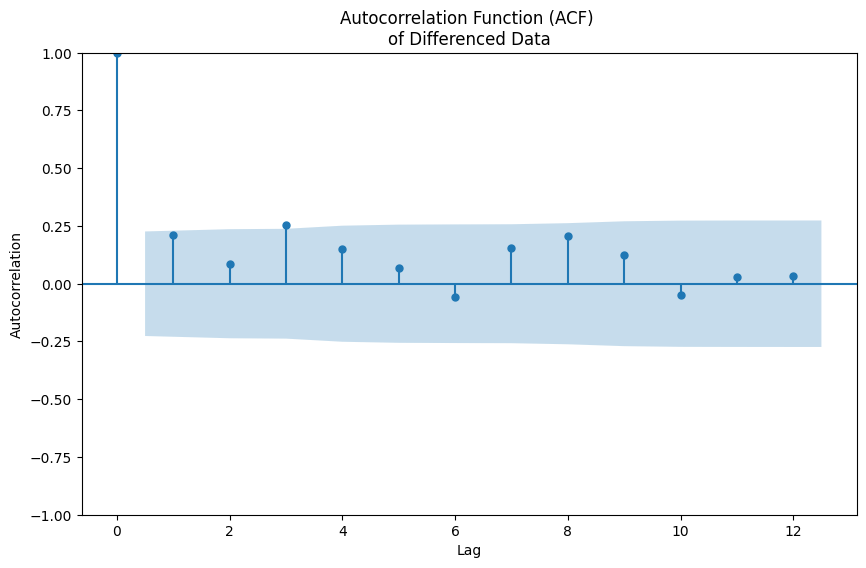

In [ ]:
# Plot ACF
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.tsa.plot_acf(df.transformed_diff, lags=12, ax=ax)  # You can adjust the number of lags
plt.title('Autocorrelation Function (ACF) \nof Differenced Data')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

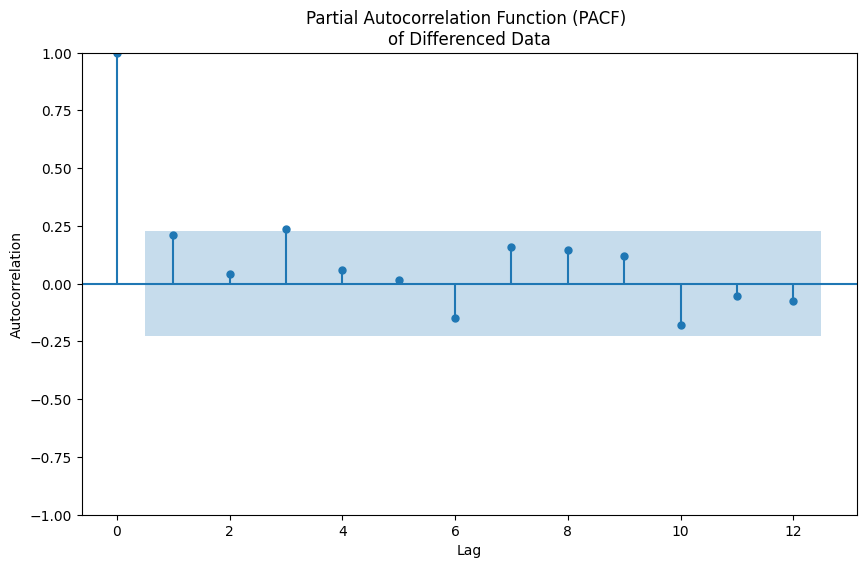

In [ ]:
# Plot PACF
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.tsa.plot_pacf(df.transformed_diff, lags=12, ax=ax)
plt.title('Partial Autocorrelation Function (PACF) \nof Differenced Data')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

#Split Data

In [ ]:

train = df.iloc[:-7, :]
test= df.iloc[-7:, :] #ini test nya

train.shape, test.shape

((68, 5), (7, 5))

In [ ]:
train

,symbol,contract,Last,Transformed,transformed_diff
date,,,,,
2018-February-23,LQG18,ICE NewCastle Coal February 2018 Futures,105.10,0.097544,0.000643
2018-March-29,LQH18,ICE NewCastle Coal March 2018 Futures,96.40,0.101850,0.004307
2018-April-27,LQJ18,ICE NewCastle Coal April 2018 Futures,93.65,0.103335,0.001485
2018-May-25,LQK18,ICE NewCastle Coal May 2018 Futures,105.45,0.097382,-0.005953
2018-June-29,LQM18,ICE NewCastle Coal June 2018 Futures,114.40,0.093495,-0.003887
...,...,...,...,...,...
2023-May-26,LQK23,ICE Newcastle Coal May 2023 Futures,160.00,0.079057,0.006452
2023-June-30,LQM23,ICE Newcastle Coal June 2023 Futures,128.05,0.088371,0.009314
2023-July-28,LQN23,ICE Newcastle Coal July 2023 Futures,134.45,0.086242,-0.002129


In [ ]:
test

,symbol,contract,Last,Transformed,transformed_diff
date,,,,,
2023-October-27,LQV23,ICE Newcastle Coal October 2023 Futures,135.20,0.086003,0.006970
2023-November-24,LQX23,ICE Newcastle Coal November 2023 Futures,122.00,0.090536,0.004533
2023-December-29,LQZ23,ICE Newcastle Coal December 2023 Futures,146.40,0.082647,-0.007888
2024-January-26,LQF24,ICE Newcastle Coal January 2024 Futures,127.10,0.088701,0.006053
2024-February-23,LQG24,ICE Newcastle Coal February 2024 Futures,119.40,0.091516,0.002815
2024-March-28,LQH24,ICE Newcastle Coal March 2024 Futures,129.10,0.088011,-0.003505
2024-April-26,LQJ24,ICE Newcastle Coal April 2024 Futures,129.75,0.087790,-0.000221


## fungsi untuk mengembalikan format tada hasil forecast ke bentuk sebelum transformasi

In [ ]:
def diff_inv(series_diff):
    # undifferecing
    # undifferenced = np.r_[first_value,series_diff].cumsum().astype('float64')
    # inverse dari 1/sqrt(Yt) -> 1/Yt^2
    series_inverted = 1 / (series_diff ** 2)
    series_inverted = series_inverted[-16:]
    return series_inverted

# Cari parameter/model terbaik

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.9 MB/s eta 0:00:00


In [ ]:
# from pmdarima import auto_arima
# import pandas as pd


# # Mencari model ARIMA terbaik secara otomatis
# model = auto_arima(train['Transformed'], start_p=1, start_q=1,
#                    test='adf',
#                    max_p=3, max_q=3,
#                    m=0,
#                    d=None,
#                    seasonal=False,
#                    start_P=0,
#                    D=0,
#                    trace=True,
#                    error_action='ignore',
#                    suppress_warnings=True,
#                    stepwise=True)

# # Menampilkan ringkasan model ARIMA terbaik yang ditemukan
# print(model.summary())

In [ ]:
import itertools

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
best_aic = float("inf")
best_pdq = None

for param in pdq:
    try:
        temp_model = ARIMA(train['Transformed'], order=param)
        temp_model_fit = temp_model.fit()
        if temp_model_fit.aic < best_aic:
            best_aic = temp_model_fit.aic
            best_pdq = param
    except:
        continue

print('Best ARIMA order:', best_pdq)


Best ARIMA order: None


In [ ]:
import itertools
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
import pandas as pd

# Define the range of p, d, q values
p = range(3) # example range for p (0, 1, 2)
d = range(1,3) # example range for d (1, 2)
q = range(3) # example range for q (0, 1, 2)

# Create a list of all possible combinations of p, d, q
pdq = list(itertools.product(p, d, q))

# Function to calculate AIC
def aic(model, data):
    return model.aic

# Function to calculate BIC
def bic(model, data):
    return model.bic

# Create an empty list to store results
results_list = []

# Iterate over all combinations of p, d, q
for p, d, q in pdq:
    try:
        # Create ARIMA model
        model = ARIMA(train['Transformed'], order=(p, d, q))

        # Fit the model
        fitted_model = model.fit()
        # fitted_model = diff_inv(fitted_model, 0.021759)

        # Calculate AIC and BIC
        aic_value = aic(fitted_model, train['Transformed'])
        bic_value = bic(fitted_model, train['Transformed'])

        # Append results to the list
        results_list.append({'p': p, 'd': d, 'q': q, 'AIC': aic_value, 'BIC': bic_value})
    except Exception as e:
        # Print the error and skip the combination
        print(f"Error with combination (p={p}, d={d}, q={q}): {e}")

# Convert the list to a DataFrame
results = pd.DataFrame(results_list)

# Sort results by AIC and BIC
results_AIC = results.sort_values(by='AIC').reset_index(drop=True)
results_BIC = results.sort_values(by='BIC').reset_index(drop=True)

# Display the sorted results
print("Results sorted by AIC:")
print(results_AIC)
print("\nResults sorted by BIC:")
print(results_BIC)


Results sorted by AIC:
    p  d  q         AIC         BIC
0   1  1  0 -511.423749 -507.014363
1   1  1  1 -511.033135 -504.419057
2   0  1  1 -510.756206 -506.346821
3   2  1  0 -510.006326 -503.392249
4   1  1  2 -509.089418 -500.270648
5   0  1  2 -509.001100 -502.387022
6   0  1  0 -508.628013 -506.423320
7   2  1  1 -507.689021 -498.870251
8   2  1  2 -507.609470 -496.586007
9   0  2  1 -499.754852 -495.375543
10  0  2  2 -498.096169 -491.527205
11  1  2  2 -497.864523 -489.105904
12  1  2  1 -497.475080 -490.906116
13  2  2  0 -494.569550 -488.000585
14  2  2  1 -494.324181 -485.565562
15  2  2  2 -493.510147 -482.561873
16  1  2  0 -486.202145 -481.822836
17  0  2  0 -475.015789 -472.826134

Results sorted by BIC:
    p  d  q         AIC         BIC
0   1  1  0 -511.423749 -507.014363
1   0  1  0 -508.628013 -506.423320
2   0  1  1 -510.756206 -506.346821
3   1  1  1 -511.033135 -504.419057
4   2  1  0 -510.006326 -503.392249
5   0  1  2 -509.001100 -502.387022
6   1  1  2 -509.

# uji signifikansi **Parameter**

## 1,1,0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

modela = ARIMA(train['Transformed'], order=(1, 1, 0))
fitted_modela = modela.fit()

fitted_modela.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Transformed   No. Observations:                   68
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 257.712
Date:                Mon, 03 Jun 2024   AIC                           -511.424
Time:                        15:54:52   BIC                           -507.014
Sample:                             0   HQIC                          -509.679
                                 - 68                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2640      0.121      2.174      0.030       0.026       0.502
sigma2      2.664e-05    3.9e-06      6.830      0.000     1.9e-05    3.43e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 5.93
Prob(Q):                              0.82   Prob(JB):                         0.05
Heteroskedasticity (H):               2.54   Skew:                             0.58
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

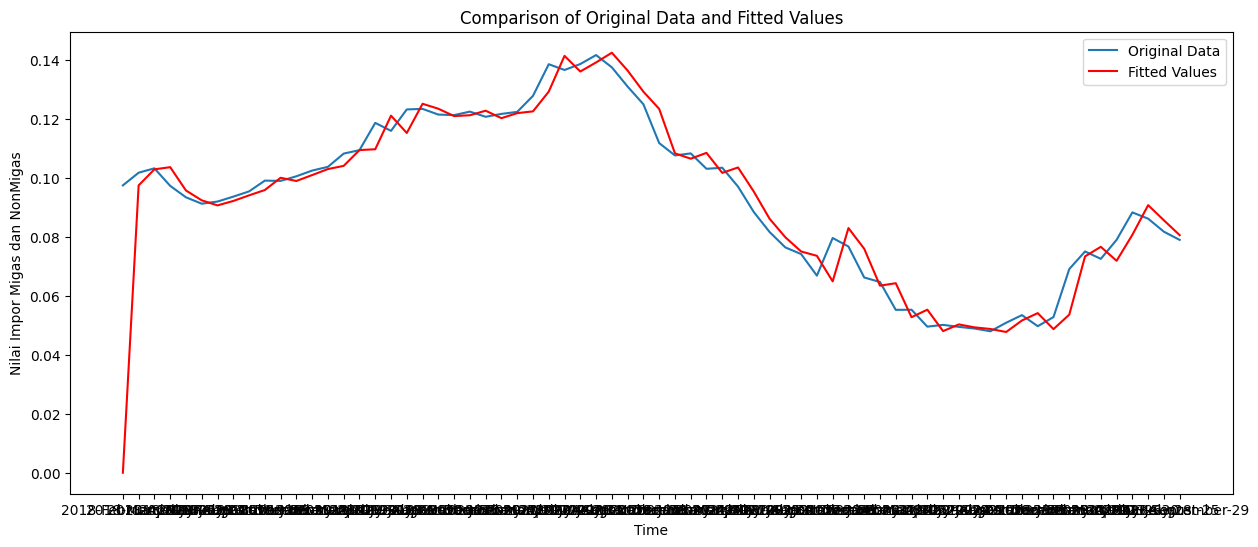

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 6))
# Plot original time series data
plt.plot(train['Transformed'], label='Original Data')

# Plot fitted values from the model
plt.plot(fitted_modela.fittedvalues, color='red', label='Fitted Values')

plt.xlabel('Time')
plt.ylabel('Nilai Impor Migas dan NonMigas')
plt.title('Comparison of Original Data and Fitted Values')
plt.legend()
plt.show()

## 1,1,1

In [ ]:
modelb = ARIMA(train['Transformed'], order=(1, 1, 1))
fitted_modelb = modelb.fit()

fitted_modelb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Transformed   No. Observations:                   68
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 258.517
Date:                Mon, 03 Jun 2024   AIC                           -511.033
Time:                        15:54:52   BIC                           -504.419
Sample:                             0   HQIC                          -508.416
                                 - 68                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8393      0.169      4.955      0.000       0.507       1.171
ma.L1         -0.6180      0.251     -2.458      0.014      -1.111      -0.125
sigma2      2.597e-05   3.76e-06      6.899      0.000    1.86e-05    3.34e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 9.80
Prob(Q):                              0.94   Prob(JB):                         0.01
Heteroskedasticity (H):               2.65   Skew:                             0.66
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

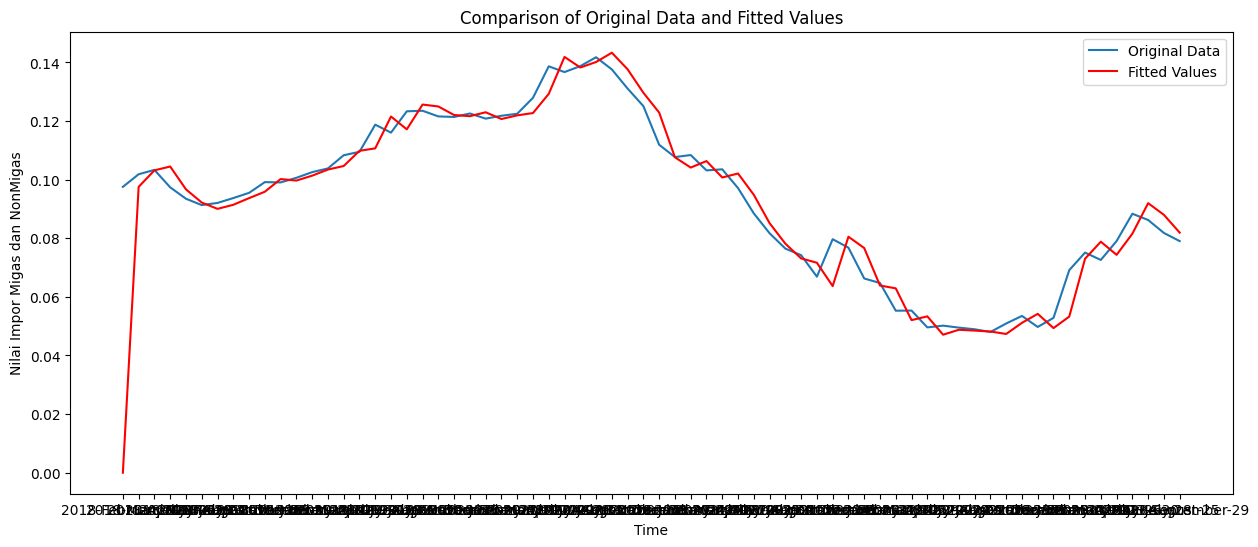

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 6))
# Plot original time series data
plt.plot(train['Transformed'], label='Original Data')

# Plot fitted values from the model
plt.plot(fitted_modelb.fittedvalues, color='red', label='Fitted Values')

plt.xlabel('Time')
plt.ylabel('Nilai Impor Migas dan NonMigas')
plt.title('Comparison of Original Data and Fitted Values')
plt.legend()
plt.show()

## 0,1,1

In [ ]:
modelc = ARIMA(train['Transformed'], order=(0, 1, 1))
fitted_modelc = modelc.fit()

fitted_modelc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Transformed   No. Observations:                   68
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 257.378
Date:                Mon, 03 Jun 2024   AIC                           -510.756
Time:                        15:54:54   BIC                           -506.347
Sample:                             0   HQIC                          -509.011
                                 - 68                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2204      0.111      1.977      0.048       0.002       0.439
sigma2      2.694e-05   4.01e-06      6.714      0.000    1.91e-05    3.48e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 5.29
Prob(Q):                              0.78   Prob(JB):                         0.07
Heteroskedasticity (H):               2.44   Skew:                             0.55
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

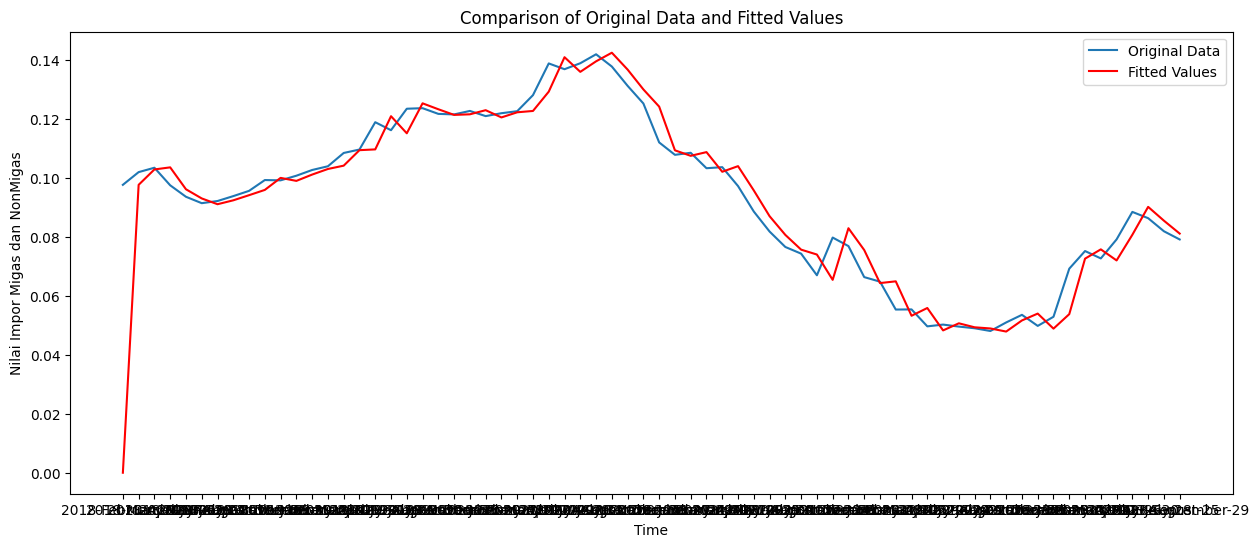

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 6))
# Plot original time series data
plt.plot(train['Transformed'], label='Original Data')

# Plot fitted values from the model
plt.plot(fitted_modelc.fittedvalues, color='red', label='Fitted Values')

plt.xlabel('Time')
plt.ylabel('Nilai Impor Migas dan NonMigas')
plt.title('Comparison of Original Data and Fitted Values')
plt.legend()
plt.show()

# forecast

## 1,1,0

In [ ]:
import statsmodels.api as sm
model1=sm.tsa.arima.ARIMA(np.asarray(train['Transformed']),order=(1, 1, 0))

results1=model1.fit()
results1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   68
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 257.712
Date:                Mon, 03 Jun 2024   AIC                           -511.424
Time:                        15:54:54   BIC                           -507.014
Sample:                             0   HQIC                          -509.679
                                 - 68                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2640      0.121      2.174      0.030       0.026       0.502
sigma2      2.664e-05    3.9e-06      6.830      0.000     1.9e-05    3.43e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 5.93
Prob(Q):                              0.82   Prob(JB):                         0.05
Heteroskedasticity (H):               2.54   Skew:                             0.58
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
import pandas as pd
import plotly.express as px

# Copy test data to y_hat_avg
y_hat_avg = test.copy()

# Forecast
y_hat_avg['ARIMA(1, 1, 0)'] = results1.forecast(len(test))
y_hat_avg['ARIMA(1, 1, 0) Forecasted'] = diff_inv(y_hat_avg['ARIMA(1, 1, 0)'])
# y_hat_avg['ARIMA(1, 1, 0) Forecasted'] = y_hat_avg['ARIMA(1, 1, 0) Forecasted'].iloc[0]

# Append train, test, and forecast for visualization
train.loc[:, 'Name'] = 'Train'
test.loc[:, 'Name'] = 'Test'

# Concatenate train and test DataFrames
x = pd.concat([train, test])

# Create DataFrame for forecasted values
y = pd.DataFrame(y_hat_avg['ARIMA(1, 1, 0) Forecasted'])
y['Name'] = 'ARIMA(1, 1, 0) Forecasted'
y.rename(columns={'ARIMA(1, 1, 0) Forecasted': 'Last'}, inplace=True)

# Concatenate all DataFrames
z = pd.concat([x, y])


# Plotting
fig = px.line(z, x=z.index, y="Last", color='Name', template='plotly_white', title='Batu Bara Forecast ARIMA(1, 1, 0)')
fig.update_xaxes(
    tickformat="%b %Y",
    tickangle=45,
    tickmode='auto',
    title_text='Month'
)
fig.show()


## 1,1,1

In [ ]:

model2=sm.tsa.arima.ARIMA(np.asarray(train['Transformed']),order=(1, 1, 1))

results2=model2.fit()
results2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   68
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 258.517
Date:                Mon, 03 Jun 2024   AIC                           -511.033
Time:                        15:54:54   BIC                           -504.419
Sample:                             0   HQIC                          -508.416
                                 - 68                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8393      0.169      4.955      0.000       0.507       1.171
ma.L1         -0.6180      0.251     -2.458      0.014      -1.111      -0.125
sigma2      2.597e-05   3.76e-06      6.899      0.000    1.86e-05    3.34e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 9.80
Prob(Q):                              0.94   Prob(JB):                         0.01
Heteroskedasticity (H):               2.65   Skew:                             0.66
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Forecast
y_hat_avg['ARIMA(1, 1, 1)'] = results2.forecast(len(test))
y_hat_avg['ARIMA(1, 1, 1) Forecasted'] = diff_inv(y_hat_avg['ARIMA(1, 1, 1)'])


# Append train, test, and forecast for visualization
train.loc[:, 'Name'] = 'Train'
test.loc[:, 'Name'] = 'Test'

# Concatenate train and test DataFrames
x = pd.concat([train, test])

# Create DataFrame for forecasted values
y = pd.DataFrame(y_hat_avg['ARIMA(1, 1, 1) Forecasted'])
y['Name'] = 'ARIMA(1, 1, 1) Forecasted'
y.rename(columns={'ARIMA(1, 1, 1) Forecasted': 'Last'}, inplace=True)

# Concatenate all DataFrames
z = pd.concat([x, y])


# Plotting
fig = px.line(z, x=z.index, y="Last", color='Name', template='plotly_white', title='Batu Bara Forecast ARIMA(1,1,1)')
fig.update_xaxes(
    tickformat="%b %Y",
    tickangle=45,
    tickmode='auto',
    title_text='Month'
)
fig.show()


## 0,1,1

In [ ]:

model3=sm.tsa.arima.ARIMA(np.asarray(train['Transformed']),order=(0, 1, 1))

results3=model3.fit()
results3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   68
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 257.378
Date:                Mon, 03 Jun 2024   AIC                           -510.756
Time:                        15:54:55   BIC                           -506.347
Sample:                             0   HQIC                          -509.011
                                 - 68                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2204      0.111      1.977      0.048       0.002       0.439
sigma2      2.694e-05   4.01e-06      6.714      0.000    1.91e-05    3.48e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 5.29
Prob(Q):                              0.78   Prob(JB):                         0.07
Heteroskedasticity (H):               2.44   Skew:                             0.55
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Forecast
y_hat_avg['ARIMA(0, 1, 1)'] = results3.forecast(len(test))
y_hat_avg['ARIMA(0, 1, 1) Forecasted'] = diff_inv(y_hat_avg['ARIMA(0, 1, 1)'])


# Append train, test, and forecast for visualization
train.loc[:, 'Name'] = 'Train'
test.loc[:, 'Name'] = 'Test'

# Concatenate train and test DataFrames
x = pd.concat([train, test])

# Create DataFrame for forecasted values
y = pd.DataFrame(y_hat_avg['ARIMA(0, 1, 1) Forecasted'])
y['Name'] = 'ARIMA(0, 1, 1) Forecasted'
y.rename(columns={'ARIMA(0, 1, 1) Forecasted': 'Last'}, inplace=True)

# Concatenate all DataFrames
z = pd.concat([x, y])


# Plotting
fig = px.line(z, x=z.index, y="Last", color='Name', template='plotly_white', title='Batu Bara Forecast ARIMA(0,1,1)')
fig.update_xaxes(
    tickformat="%b %Y",
    tickangle=45,
    tickmode='auto',
    title_text='Month'
)
fig.show()


# uji asumsi residual

In [ ]:
y_hat_avg

,symbol,contract,Last,Transformed,transformed_diff,"ARIMA(1, 1, 0)","ARIMA(1, 1, 0) Forecasted","ARIMA(1, 1, 1)","ARIMA(1, 1, 1) Forecasted","ARIMA(0, 1, 1)","ARIMA(0, 1, 1) Forecasted"
date,,,,,,,,,,,
2023-October-27,LQV23,ICE Newcastle Coal October 2023 Futures,135.20,0.086003,0.006970,0.078298,163.116566,0.078483,162.348548,0.078593,161.893059
2023-November-24,LQX23,ICE Newcastle Coal November 2023 Futures,122.00,0.090536,0.004533,0.078104,163.927120,0.078022,164.272469,0.078593,161.893059
2023-December-29,LQZ23,ICE Newcastle Coal December 2023 Futures,146.40,0.082647,-0.007888,0.078053,164.142102,0.077635,165.913692,0.078593,161.893059
2024-January-26,LQF24,ICE Newcastle Coal January 2024 Futures,127.10,0.088701,0.006053,0.078040,164.198924,0.077311,167.310191,0.078593,161.893059
2024-February-23,LQG24,ICE Newcastle Coal February 2024 Futures,119.40,0.091516,0.002815,0.078036,164.213930,0.077038,168.495896,0.078593,161.893059
2024-March-28,LQH24,ICE Newcastle Coal March 2024 Futures,129.10,0.088011,-0.003505,0.078035,164.217891,0.076809,169.500786,0.078593,161.893059
2024-April-26,LQJ24,ICE Newcastle Coal April 2024 Futures,129.75,0.087790,-0.000221,0.078035,164.218937,0.076617,170.351123,0.078593,161.893059


## 1,1,1

In [ ]:
# normalitas residual
from scipy import stats
arima_res = test['Transformed'] - y_hat_avg['ARIMA(1, 1, 1)']
stats.kstest(arima_res, 'norm')

KstestResult(statistic=0.5019995754467291, pvalue=0.037161247438636386, statistic_location=0.005012213338323385, statistic_sign=-1)

In [ ]:
# normalitas residual
from scipy import stats
arima_res = test['Transformed'] - y_hat_avg['ARIMA(1, 1, 1)']
# Uji normalitas menggunakan Shapiro-Wilk
shapiro_stat, shapiro_pvalue = stats.shapiro(arima_res)
print(f'Shapiro-Wilk test statistic: {shapiro_stat}')
print(f'Shapiro-Wilk p-value: {shapiro_pvalue}')

if shapiro_pvalue > 0.05:
    print("Residuals are normally distributed (fail to reject H0)")
else:
    print("Residuals are not normally distributed (reject H0)")

Shapiro-Wilk test statistic: 0.9138275384902954
Shapiro-Wilk p-value: 0.42301034927368164
Residuals are normally distributed (fail to reject H0)


In [ ]:
# white noise
sm.stats.acorr_ljungbox(arima_res, lags=1)

,lb_stat,lb_pvalue
1,0.649141,0.42042


## 1,1,0

In [ ]:
# normalitas residual
from scipy import stats
arima_res = test['Transformed'] - y_hat_avg['ARIMA(1, 1, 0)']
# Uji normalitas menggunakan Shapiro-Wilk
shapiro_stat, shapiro_pvalue = stats.shapiro(arima_res)
print(f'Shapiro-Wilk test statistic: {shapiro_stat}')
print(f'Shapiro-Wilk p-value: {shapiro_pvalue}')

if shapiro_pvalue > 0.05:
    print("Residuals are normally distributed (fail to reject H0)")
else:
    print("Residuals are not normally distributed (reject H0)")

Shapiro-Wilk test statistic: 0.9551457762718201
Shapiro-Wilk p-value: 0.7761679887771606
Residuals are normally distributed (fail to reject H0)


In [ ]:
# white noise
sm.stats.acorr_ljungbox(arima_res, lags=1)

,lb_stat,lb_pvalue
1,1.493516,0.221672


## 0,1,1

In [ ]:
# normalitas residual
from scipy import stats
arima_res = test['Transformed'] - y_hat_avg['ARIMA(0, 1, 1)']
# Uji normalitas menggunakan Shapiro-Wilk
shapiro_stat, shapiro_pvalue = stats.shapiro(arima_res)
print(f'Shapiro-Wilk test statistic: {shapiro_stat}')
print(f'Shapiro-Wilk p-value: {shapiro_pvalue}')

if shapiro_pvalue > 0.05:
    print("Residuals are normally distributed (fail to reject H0)")
else:
    print("Residuals are not normally distributed (reject H0)")

Shapiro-Wilk test statistic: 0.9521822929382324
Shapiro-Wilk p-value: 0.7495148777961731
Residuals are normally distributed (fail to reject H0)


In [ ]:
# white noise
sm.stats.acorr_ljungbox(arima_res, lags=1)

,lb_stat,lb_pvalue
1,1.520374,0.217563


# Evaluation Metrics

## 1,1,0

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Menghitung RMSE
rmse = np.sqrt(mean_squared_error(test['Transformed'], y_hat_avg['ARIMA(1, 1, 0)']))
print('RMSE:', rmse)

# Menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test['Transformed'], y_hat_avg['ARIMA(1, 1, 0)'])
print('MAPE:', mape)

# Menghitung MAE
mae = mean_absolute_error(test['Transformed'], y_hat_avg['ARIMA(1, 1, 0)'])
print('MAE:', mae)

RMSE: 0.010177526277707964
MAPE: 11.063534317382835
MAE: 0.00980045112473184


## 1,1,1

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Menghitung RMSE
rmse = np.sqrt(mean_squared_error(test['Transformed'], y_hat_avg['ARIMA(1, 1, 1)']))
print('RMSE:', rmse)

# Menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test['Transformed'], y_hat_avg['ARIMA(1, 1, 1)'])
print('MAPE:', mape)

# Menghitung MAE
mae = mean_absolute_error(test['Transformed'], y_hat_avg['ARIMA(1, 1, 1)'])
print('MAE:', mae)

RMSE: 0.010875387795489844
MAPE: 11.820780295191351
MAE: 0.01046974247984056


## 0,1,1

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Menghitung RMSE
rmse = np.sqrt(mean_squared_error(test['Transformed'], y_hat_avg['ARIMA(0, 1, 1)']))
print('RMSE:', rmse)

# Menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test['Transformed'], y_hat_avg['ARIMA(0, 1, 1)'])
print('MAPE:', mape)

# Menghitung MAE
mae = mean_absolute_error(test['Transformed'], y_hat_avg['ARIMA(0, 1, 1)'])
print('MAE:', mae)

RMSE: 0.009683455748494161
MAPE: 10.486199472037065
MAE: 0.00929291436478401


# Forecast beberapa data kedepan

## (1,1,0)

In [ ]:
# Membangun model ARIMA(1, 1, 0)
model = sm.tsa.arima.ARIMA(df['Transformed'], order=(1, 1, 0))

# Fit model
results = model.fit()

# Melakukan prediksi untuk 3 data ke depan
forecast = results.get_forecast(steps=8)
forecast_values = forecast.predicted_mean
forecast_values = diff_inv(forecast_values)
# forecast_values['date'] = pd.date_range(start='2024-05-01', periods=8, freq='M')
# # forecast_values.set_index('date', inplace=True)

# Menampilkan hasil prediksi
print("Future Forecasted values ARIMA(1,1,0):")
print(forecast_values)

Future Forecasted values ARIMA(1,1,0):
75    129.886762
76    129.915434
77    129.921440
78    129.922698
79    129.922961
80    129.923017
81    129.923028
82    129.923031
Name: predicted_mean, dtype: float64


In [ ]:
# Membangun model ARIMA(1, 0, 0)
model = sm.tsa.arima.ARIMA(df['Transformed'], order=(1, 1, 1))

# Fit model
results = model.fit()

# Melakukan prediksi untuk 3 data ke depan
forecast = results.get_forecast(steps=8)
forecast_values = forecast.predicted_mean
forecast_values = diff_inv(forecast_values)

# Menampilkan hasil prediksi
print("Forecasted values:")
print(forecast_values)

Forecasted values:
75    130.187341
76    130.491862
77    130.703624
78    130.850749
79    130.952901
80    131.023796
81    131.072984
82    131.107104
Name: predicted_mean, dtype: float64


In [ ]:
# Membangun model ARIMA(1, 0, 0)
model = sm.tsa.arima.ARIMA(df['Transformed'], order=(0, 1, 1))

# Fit model
results = model.fit()

# Melakukan prediksi untuk 3 data ke depan
forecast = results.get_forecast(steps=8)
forecast_values = forecast.predicted_mean
forecast_values = diff_inv(forecast_values)

# Menampilkan hasil prediksi
print("Forecasted values:")
print(forecast_values)

Forecasted values:
75    129.472924
76    129.472924
77    129.472924
78    129.472924
79    129.472924
80    129.472924
81    129.472924
82    129.472924
Name: predicted_mean, dtype: float64


In [ ]:
forecast_values

75    129.472924
76    129.472924
77    129.472924
78    129.472924
79    129.472924
80    129.472924
81    129.472924
82    129.472924
Name: predicted_mean, dtype: float64

In [ ]:
# Daftar bulan dari Mei hingga Desember
months = ["Mei", "Juni", "Juli", "Agustus", "September", "Oktober", "November", "Desember"]

# Membuat DataFrame dengan kolom Bulan dan Predicted_Mean
forecast_df = pd.DataFrame({'Bulan': months, 'Predicted_Mean': forecast_values})

# Menetapkan kolom Bulan sebagai indeks
forecast_df.set_index('Bulan', inplace=True)

# Menampilkan DataFrame
forecast_df

,Predicted_Mean
Bulan,
Mei,129.472924
Juni,129.472924
Juli,129.472924
Agustus,129.472924
September,129.472924
Oktober,129.472924
November,129.472924
Desember,129.472924


In [ ]:
import plotly.express as px

# Asumsi df sudah terdefinisi dan memiliki kolom 'Last'
fig = px.line(forecast_df, y='Predicted_Mean', template='plotly_white')
fig.update_layout(
    title='Harga Coal Newcastle',
    yaxis_title='Last'  # Menambahkan judul pada sumbu y
)
fig.show()
